In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
sns.set(font_scale = 2)

In [2]:
data = pd.read_csv("mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#preprocessing of dataset
target_var = data['class']

In [5]:
data.drop('class', axis = 1, inplace=True)

In [6]:
y = LabelEncoder().fit_transform(target_var)
# p == 1, e == 0

In [7]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [8]:
sns.set_style('whitegrid')

In [9]:
target_dist = target_var.value_counts()

Text(0.5,1,'Target variable distribution')

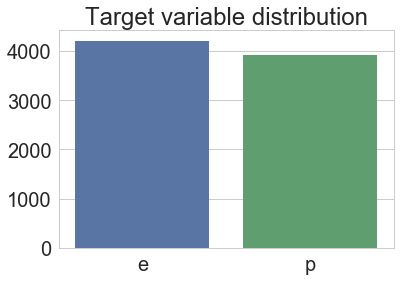

In [10]:
sns.barplot(target_dist.index, target_dist.values)
plt.title('Target variable distribution')

Good questions to ask:
1. Is there a quick and simple parameter that could be able to discriminate b/w poisonous and non-poisonous mushrooms?
2. Is there any observable variation for mushroom parts (cap, gill, stalk, veil, or ring) able to discriminate between poisonous and edible mushrooms?
3. How the informations from question 2 coul be combined for increase the precision of ushroom identification?
4. Use the full dataset for classification using Random Forest and identify the most significant features.

        E    P
odor          
a     1.0  0.0
c     0.0  1.0
f     0.0  1.0
l     1.0  0.0
m     0.0  1.0


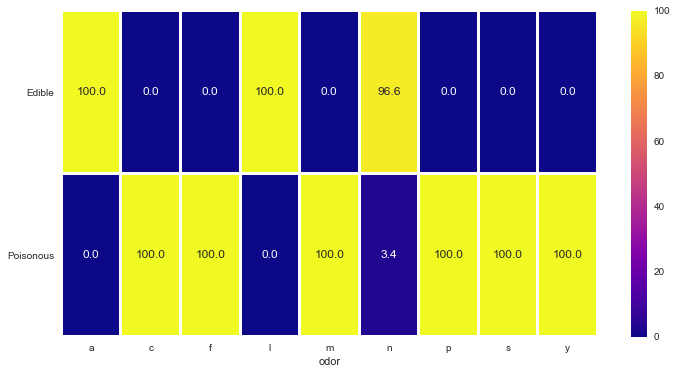

In [11]:
sns.set_style('whitegrid')
odor = pd.DataFrame({'p':y, 'odor':data['odor']})
# count the 1 (poison) occurence on the dataset per odor
odor_poison = odor.groupby('odor').sum()
# get the count per odor
odor_poison_size = odor.groupby('odor').size()
odor_data = pd.DataFrame({'P': odor_poison['p']/odor_poison_size, 
                          'E':(odor_poison_size-odor_poison['p'])/odor_poison_size})
print(odor_data.head())
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.set(font_scale = 2)
sns.set(style='whitegrid', context='notebook')
sns.heatmap(odor_data.T*100, fmt = '.1f', cmap = 'plasma', cbar = True, annot = True, 
            linewidth = 2, yticklabels=('Edible', 'Poisonous'))
plt.yticks(rotation=0)
plt.show()

             precision    recall  f1-score   support

     edible       0.97      1.00      0.99      4208
  poisonous       1.00      0.97      0.98      3916

avg / total       0.99      0.99      0.99      8124

Accuracy:  0.985228951256


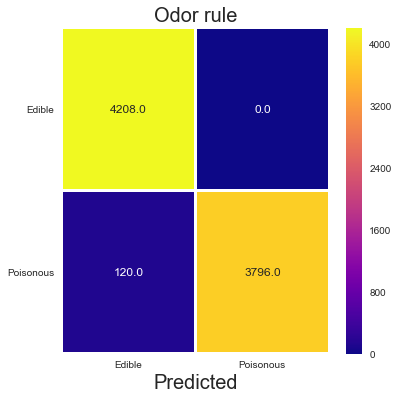

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class OdorDecision(BaseEstimator, TransformerMixin):
    def __init__(self, non_poison=['a', 'l', 'n']):
        self.non_poison = non_poison
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        pred = [0 if i in self.non_poison else 1 for i in X]
        return pred
    
X = data['odor'].values
od = OdorDecision()
pred = od.predict(X)
print(classification_report(y, pred, target_names = ['edible',
                                                     'poisonous']))
print('Accuracy: ', accuracy_score(y, pred))
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y, pred),
           cmap = 'plasma', annot = True,
            fmt = '.1f', cbar = True,
            linewidth = 2,
            yticklabels=('Edible', 'Poisonous'),
            xticklabels=('Edible', 'Poisonous')
           )
plt.title('Odor rule', fontsize=20)
plt.yticks(rotation=0)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel
plt.show()

             precision    recall  f1-score   support

     edible       0.72      0.73      0.72      3366
  poisonous       0.70      0.69      0.70      3133

avg / total       0.71      0.71      0.71      6499

Accuracy:  0.710263117403


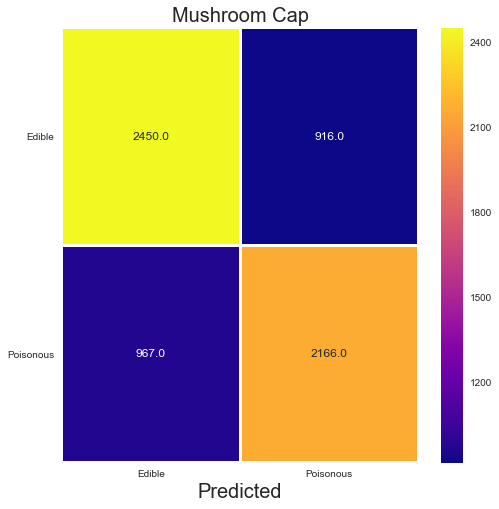

In [13]:
from sklearn.model_selection import cross_val_predict
model_accuracy = []

caps = data[['cap-shape', 'cap-surface', 'cap-color']]
X_dum = pd.get_dummies(caps).values

X_train, X_test, y_train, y_test = train_test_split(X_dum, y, stratify=y,
                                                   test_size=0.2, 
                                                   random_state=101)
rfc_caps = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_caps.fit(X_train, y_train)

#test in sample precision with CV

y_train_pred = cross_val_predict(rfc_caps, X_train, y_train, cv = 5)
    
print(classification_report(y_train, y_train_pred, target_names = ['edible',
                                                                'poisonous']))
print('Accuracy: ', accuracy_score(y_train, y_train_pred))
model_accuracy.append(accuracy_score(y_train, y_train_pred))
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           cmap = 'plasma', annot = True,
           fmt = '.1f', cbar = True, linewidth = 2,
           yticklabels = ('Edible', 'Poisonous'),
           xticklabels = ('Edible', 'Poisonous'))
plt.title('Mushroom Cap', fontsize=20)
plt.yticks(rotation=0)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel
plt.show()

             precision    recall  f1-score   support

          0       0.95      0.82      0.88      3366
          1       0.83      0.95      0.89      3133

avg / total       0.89      0.88      0.88      6499

Accuracy:  0.88121249423


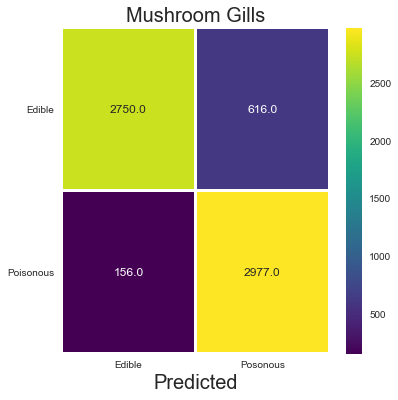

In [14]:
gills = data[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]

X_gills = pd.get_dummies(gills).values

X_train, X_test, y_train, y_test = train_test_split(X_gills, y, stratify=y,
                                                   test_size = 0.2, random_state = 101)

rfc_gills = RandomForestClassifier(n_estimators=100, random_state=42)

rfc_gills.fit(X_train, y_train)

# In sample precision with CV
y_train_pred = cross_val_predict(rfc_gills, X_train, y_train, cv = 5)
print(classification_report(y_train, y_train_pred))
print('Accuracy: ', accuracy_score(y_train, y_train_pred))
model_accuracy.append(accuracy_score(y_train, y_train_pred))
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           cmap = 'viridis', annot = True,
            fmt = '.1f', cbar = True,linewidth = 2, 
            yticklabels=('Edible', 'Poisonous'),
            xticklabels=('Edible', 'Posonous')
           )
plt.title('Mushroom Gills',fontsize=20)
plt.yticks(rotation=0)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel
plt.show()

             precision    recall  f1-score   support

          0       0.98      0.97      0.97      3366
          1       0.96      0.98      0.97      3133

avg / total       0.97      0.97      0.97      6499

Accuracy:  0.97338052008


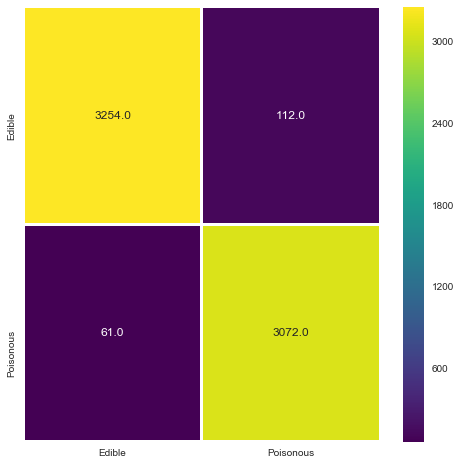

In [15]:
stalks = data[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
              'stalk-surface-below-ring']]
X_stalks = pd.get_dummies(stalks).values

X_train, X_test, y_train, y_test = train_test_split(X_stalks, y, stratify=y,
                                                   test_size=0.2, random_state = 101)
rfc_stalks = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_stalks.fit(X_train, y_train)

#in sample
y_train_pred = cross_val_predict(rfc_stalks, X_train, y_train, cv = 5)
print(classification_report(y_train, y_train_pred))
print('Accuracy: ', accuracy_score(y_train, y_train_pred))
model_accuracy.append(accuracy_score(y_train, y_train_pred))
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           cmap = 'viridis', annot = True,
           fmt = '.1f', cbar = True, linewidth = 2,
           yticklabels = ('Edible', 'Poisonous'),
           xticklabels = ('Edible', 'Poisonous'))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       842
          1       0.98      0.99      0.98       783

avg / total       0.98      0.98      0.98      1625

Accuracy:  0.984


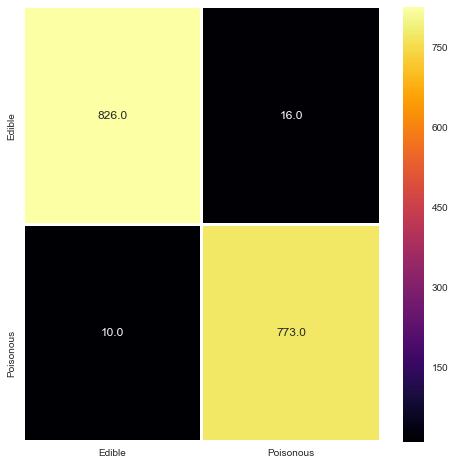

In [16]:
combined_data = data = data[['gill-attachment', 'gill-spacing', 'gill-size',
                            'gill-color', 'stalk-shape', 'stalk-root',
                            'stalk-surface-above-ring', 'stalk-surface-below-ring',
                            'ring-number', 'ring-type']]
X_comb = pd.get_dummies(combined_data)
X_train, X_test, y_train, y_test = train_test_split(X_comb, y, stratify=y,
                                                   test_size=0.2, random_state=101)
rf_comb = RandomForestClassifier(n_estimators=100, random_state=42)
rf_comb.fit(X_train, y_train)

y_pred = rf_comb.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(y_test, y_pred),
           cmap = 'inferno', annot = True,
           fmt = '.1f', cbar = True, linewidth = 2,
           yticklabels = ('Edible', 'Poisonous'),
           xticklabels = ('Edible', 'Poisonous'))

In [20]:
combined_names = ['Gills', 'Stalks', 'Rings']
n = [part_names.index(i) for i in combined_names]
model_acc = [model_accuracy[i] for i in n]

model_acc.append(accuracy_score(y_test, y_pred))
combined_names.append('Combined')
sns.barplot(combined_names, model_acc)#, kwargs={'fontsize':18})
plt.ylabel('Accuracy Score')
plt.title('Mushroom Parts Evaluation', fontsize = 20);

NameError: name 'part_names' is not defined

In [21]:
#creating subsets in this part
from scipy.stats import mode
gills = data[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]
stalks = data[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
              'stalk-surface-below-ring']]
rings = data[['ring-number', 'ring-type']]

rf_gills = RandomForestClassifier(n_estimators=100, random_state=42)
rf_stalks = RandomForestClassifier(n_estimators=100, random_state=42)
rf_rings = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
#create function
def majorityClassifier(model, data, y):
    ys = []
    pred_class = []
    for clf, d in zip(model, data): #run in parallels model and data
        x_dum = pd.get_dummies(d)
        X_train, X_test, y_train, y_test = train_test_split(X_dum, y, 
                                stratify=y, test_size = 0.2, random_state = 101)
        ys.append(y_test)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        pred_class.append(preds)
        pred_class = np.array(pred_class).T
        maj_vote = mode(pred_class, axis = 1)[0]
        return maj_vote, ys

In [23]:
preds, y_all = majorityClassifier([rf_gills, rf_stalks, rf_rings],
                                 [gills, stalks, rings], y)

In [24]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.70      0.76      0.73       842
          1       0.71      0.64      0.68       783

avg / total       0.70      0.70      0.70      1625

